# **Proyecto 1 :** Análisis estadístico del agotamiento en trabajo remoto mediante modelos de regresión

### Integrantes:
- Gibrán Leonardo Chávez González
- Diana Fernanda Barbosa Dueñas
- Julieta Madrigal Flores
---------

##Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import statsmodels.api as sm
import statistics as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

##Dataset

In [2]:
df = pd.read_csv('work_from_home_burnout_dataset.csv')
df.head()

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score,burnout_risk
0,1,Weekday,9.59,11.86,4,2,0,7.55,91.2,19.17,Low
1,1,Weekend,7.38,10.33,4,1,0,6.69,82.0,29.70,Low
2,1,Weekend,6.31,8.92,1,2,0,8.87,80.6,32.93,Low
3,1,Weekday,8.34,10.70,4,1,1,8.13,70.0,45.47,Low
4,1,Weekend,6.97,9.83,1,2,0,5.85,67.1,51.61,Low


In [3]:
len(df.columns)

11

In [4]:
len(df)

1800

##Análisis exploratorio de datos (EDA)

In [5]:
df.describe()

,user_id,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate,burnout_score
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,90.500000,6.515117,9.271406,1.941111,3.028889,0.358889,6.996467,72.308556,44.009978
std,51.975162,2.290521,2.409253,1.696178,1.417844,0.479808,1.061740,14.978647,23.881782
min,1.000000,3.000000,4.510000,0.000000,1.000000,0.000000,4.500000,40.000000,2.500000
25%,45.750000,4.430000,7.240000,1.000000,2.000000,0.000000,6.280000,62.300000,25.370000
50%,90.500000,6.445000,9.210000,2.000000,3.000000,0.000000,6.990000,74.500000,39.270000
75%,135.250000,8.510000,11.310000,3.000000,4.000000,1.000000,7.750000,83.700000,58.197500
max,180.000000,12.170000,15.700000,10.000000,5.000000,1.000000,10.800000,107.200000,143.920000


##Definir variables X y Y

In [6]:
# Creación de matrix X
X = df.drop(['user_id', 'burnout_score', 'burnout_risk'], axis=1)
X

,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate
0,Weekday,9.59,11.86,4,2,0,7.55,91.2
1,Weekend,7.38,10.33,4,1,0,6.69,82.0
2,Weekend,6.31,8.92,1,2,0,8.87,80.6
3,Weekday,8.34,10.70,4,1,1,8.13,70.0
4,Weekend,6.97,9.83,1,2,0,5.85,67.1
...,...,...,...,...,...,...,...,...
1795,Weekend,6.33,8.16,0,4,0,5.59,73.5
1796,Weekend,4.70,7.88,0,4,0,6.69,89.8
1797,Weekend,3.92,6.39,2,1,0,6.77,74.6
1798,Weekday,8.93,11.11,2,5,0,8.28,74.6


In [7]:
# Quitar outliers

for i in range(len(X['task_completion_rate'])):
    if X['task_completion_rate'][i] > 100:
        X['task_completion_rate'][i] = 100

X.describe()


/tmp/ipython-input-343373136.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X['task_completion_rate'][i] = 100
/tmp/ipython-input-343373136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,6.515117,9.271406,1.941111,3.028889,0.358889,6.996467,72.295889
std,2.290521,2.409253,1.696178,1.417844,0.479808,1.061740,14.953315
min,3.000000,4.510000,0.000000,1.000000,0.000000,4.500000,40.000000
25%,4.430000,7.240000,1.000000,2.000000,0.000000,6.280000,62.300000
50%,6.445000,9.210000,2.000000,3.000000,0.000000,6.990000,74.500000
75%,8.510000,11.310000,3.000000,4.000000,1.000000,7.750000,83.700000
max,12.170000,15.700000,10.000000,5.000000,1.000000,10.800000,100.000000


In [8]:
# Creación de vector y
y = df['burnout_score']

In [9]:
# Variables categoricas a boleanas
X['day_type'] = X['day_type'].map({'Weekday': 1, 'Weekend': 0})
X.head()

,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate
0,1,9.59,11.86,4,2,0,7.55,91.2
1,0,7.38,10.33,4,1,0,6.69,82.0
2,0,6.31,8.92,1,2,0,8.87,80.6
3,1,8.34,10.70,4,1,1,8.13,70.0
4,0,6.97,9.83,1,2,0,5.85,67.1


In [10]:
variables_escalables = ['work_hours', 'screen_time_hours', 'meetings_count', 'breaks_taken', 'after_hours_work', 'sleep_hours', 'task_completion_rate']

##Separar el dataset en train y test

In [11]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

##Estandarización

In [12]:
# Estandarización de los datos (sin la variable categórica)
scaler = StandardScaler()

scaler.fit(X_train1[variables_escalables])
X_train_scaled = scaler.transform(X_train1[variables_escalables])
X_test_scaled = scaler.transform(X_test1[variables_escalables])

X_train1.loc[:, variables_escalables] = X_train_scaled
X_test1.loc[:, variables_escalables] = X_test_scaled



/tmp/ipython-input-921300716.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.01395989  0.01395989  0.01395989 ... -0.57235558  0.01395989
 -0.57235558]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train1.loc[:, variables_escalables] = X_train_scaled
/tmp/ipython-input-921300716.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.70670705 -0.70670705  0.69889813 ... -0.00390446 -0.70670705
 -0.00390446]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train1.loc[:, variables_escalables] = X_train_scaled
/tmp/ipython-input-921300716.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.75310303  1.32783956  1.32783956 ... -0.75310303 -0.75310303
 -0.75310303]' has dtype inc

In [13]:
X_train1.describe()

,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,sleep_hours,task_completion_rate
count,1260.000000,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03,1.260000e+03
mean,0.488889,-1.015061e-16,-2.819614e-16,-4.793344e-17,1.550788e-17,-1.691768e-17,-2.128809e-16,2.255691e-17
std,0.500075,1.000397e+00,1.000397e+00,1.000397e+00,1.000397e+00,1.000397e+00,1.000397e+00,1.000397e+00
min,0.000000,-1.521709e+00,-1.954773e+00,-1.158671e+00,-1.409510e+00,-7.531030e-01,-2.392682e+00,-2.134108e+00
25%,0.000000,-9.145165e-01,-8.426598e-01,-5.723556e-01,-7.067070e-01,-7.531030e-01,-6.784370e-01,-6.935354e-01
50%,0.000000,-1.457055e-02,-1.887193e-02,1.395989e-02,-3.904459e-03,-7.531030e-01,-1.073376e-02,1.521989e-01
75%,1.000000,8.734484e-01,8.553729e-01,6.002754e-01,6.988981e-01,1.327840e+00,6.948534e-01,7.702995e-01
max,1.000000,2.455401e+00,2.654320e+00,4.704484e+00,1.401701e+00,1.327840e+00,3.574028e+00,1.853637e+00


#**MODELO 1**

$$y = \beta_0 + \beta_1 (\text{day_type}) + \beta_2 (\text{work_hours}) + \beta_3 (\text{screen_time_hours}) + \beta_4 (\text{meetings_count}) + \beta_5 (\text{breaks_taken}) + \beta_6 (\text{after_hours_work}) + \beta_7 (\text{sleep_hours}) + \beta_8 (\text{task_completion_rate})$$

##Regresión sin penalización

In [14]:
X_train1_w_const = sm.add_constant(X_train1)
model = sm.OLS(y_train1, X_train1_w_const)
results1 = model.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:          burnout_score   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     1791.
Date:                Fri, 20 Feb 2026   Prob (F-statistic):               0.00
Time:                        14:39:14   Log-Likelihood:                -4206.1
No. Observations:                1260   AIC:                             8430.
Df Residuals:                    1251   BIC:                             8476.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   43.9800 

In [15]:
# R2 del modelo
r2_1 = results1.rsquared
r2_1

np.float64(0.9196847629807096)

##Prueba de hipotésis

Para cada variable se evalúa:

$$
H_0: \beta_i = 0 \\
H_1: \beta_i \neq 0
$$
$$
\text{Donde } \beta_i \text{ representa el coeficiente asociado a cada variable explicativa y se utiliza un nivel de significancia de: } \alpha = 0.05$$

In [16]:
tabla_pvalues_modelo1 = pd.DataFrame({
    'Variable': results1.pvalues.index,
    'p-value': results1.pvalues.values.round(4)
})

tabla_pvalues_modelo1

,Variable,p-value
0,const,0.0000
1,day_type,0.3796
2,work_hours,0.1137
3,screen_time_hours,0.1042
4,meetings_count,0.2956
5,breaks_taken,0.6272
6,after_hours_work,0.2111
7,sleep_hours,0.4801
8,task_completion_rate,0.0000


Con un nivel de significancia de α = 0.05, los resultados de la regresión indican que solo task_completion_rate rechaza la hipótesis nula, esto significa que existe evidencia estadística suficiente para afirmar que su coeficiente beta diferente de cero y que tiene un efecto real en el burnout score.

Por otro lado, las otras sietes variables predictoras no logran rechazar la hipótesis nula y por ende, no se puede concluir que tengan un efecto estadísticamente signficativo sobre la variable dependiente. Sin embargo, esto no significa que no tengan relación con el burnout score, solo que el modelo no es capaz de separar de forma confiable el efecto individual, por una multicolinealidad entre predictores.

##Con Ridge

In [17]:
# Se usa la matriz X pero SIN la fila de unos
ridge_1 = Ridge(alpha=10)
ridge_1.fit(X_train1, y_train1)
r2_ridge_1 = ridge_1.score(X_train1, y_train1)

print(r2_ridge_1, ridge_1.intercept_, ridge_1.coef_)


0.9196215176635628 44.03692677902174 [  0.60570172  -0.93945523   0.91153149  -0.23480524   0.09554175
  -0.23528647   0.13141672 -22.86595271]


##Con Lasso

In [18]:
lasso_1 = Lasso(alpha=10)
lasso_1.fit(X_train1, y_train1)
r2_lasso_1 = lasso_1.score(X_train1, y_train1)

print(r2_lasso_1, lasso_1.intercept_, lasso_1.coef_)

0.7463772210493876 44.33304761904762 [  0.           0.           0.           0.           0.
  -0.           0.         -13.05822368]


##Con Elastic Net

In [19]:
elasticnet_1 = ElasticNet(alpha=10, l1_ratio=0.5)
elasticnet_1.fit(X_train1, y_train1)
r2_elasticnet_1 = elasticnet_1.score(X_train1, y_train1)

print(r2_elasticnet_1, elasticnet_1.intercept_, elasticnet_1.coef_)

0.22431780741481755 44.33304761904762 [ 0.          0.          0.          0.          0.          0.
 -0.         -3.00970395]


##Tabla comparativa

In [20]:
tabla_modelo_1 = pd.DataFrame(
    index=['Sin penalización', 'Lasso', 'Ridge', 'Elastic Net'],
    data={
        'R²': [results1.rsquared, r2_lasso_1, r2_ridge_1, r2_elasticnet_1]
    }
)

tabla_modelo_1

,R²
Sin penalización,0.919685
Lasso,0.746377
Ridge,0.919622
Elastic Net,0.224318


# **MODELO 2**

$$y = \beta_0 + \beta_1 (\text{after_hours_work}) + \beta_2 (\text{task_completion_rate}) + \beta_3 (\text{after_hours_work} \times \text{task_completion_rate})$$

## Definimos la matriz X para el segundo modelo

In [21]:
X2 = X.drop(['day_type', 'work_hours', 'screen_time_hours', 'meetings_count', 'breaks_taken', 'sleep_hours'], axis=1)

In [22]:
X2.head()

,after_hours_work,task_completion_rate
0,0,91.2
1,0,82.0
2,0,80.6
3,1,70.0
4,0,67.1


In [23]:
X2['after_hours * task_completion'] = X2['after_hours_work'] * X2['task_completion_rate']
X2.head()

,after_hours_work,task_completion_rate,after_hours * task_completion
0,0,91.2,0.0
1,0,82.0,0.0
2,0,80.6,0.0
3,1,70.0,70.0
4,0,67.1,0.0


##Separar el dataset en train y test

In [24]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42)

##Estandarizar

In [25]:
scaler2 = StandardScaler()
scaler2.fit(X_train2)
X_train2_scaled = scaler2.transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)

##Regresión sin penalización

In [26]:
X_train2_w_const = sm.add_constant(X_train2_scaled)
model2 = sm.OLS(y_train2, X_train2_w_const)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:          burnout_score   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     4775.
Date:                Fri, 20 Feb 2026   Prob (F-statistic):               0.00
Time:                        14:39:14   Log-Likelihood:                -4208.4
No. Observations:                1260   AIC:                             8425.
Df Residuals:                    1256   BIC:                             8445.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.3330      0.193    230.094      0.0

##Prueba de hipotésis

Para cada variable se evalúa:

$$
H_0: \beta_i = 0 \\
H_1: \beta_i \neq 0
$$
$$
\text{Donde } \beta_i \text{ representa el coeficiente asociado a cada variable explicativa y se utiliza un nivel de significancia de: } \alpha = 0.05$$

In [27]:
tabla_pvalues_modelo2 = pd.DataFrame({
    'Variable': results2.pvalues.index,
    'p-value': results2.pvalues.values.round(4)
})

#print(tabla_pvalues_modelo2.to_string(index=False))
tabla_pvalues_modelo2

,Variable,p-value
0,const,0.0000
1,x1,0.4939
2,x2,0.0000
3,x3,0.6537


Con un nivel de significancia de α = 0.05, los resultados demuestran que solo task_completion_rate logra rechazar la hipótesis nula y que su efecto sobre el burnout score es estadísticamente significativo.

Por otro lado, after_hours_work y la interacción no logran rechazar la hipótesis nula, por lo que no existe suficiente evidencia estadística para afirmar que trabajar fuera de horario tiene un efecto signficativo sobre el burnout ni que modifica el efecto del task_completion_rate. El R² de 0.919 es idéntico al del modelo 1, lo que sugiere que agregar la variable de after_hours_work no aporta capacidad explicativa adicional al modelo.

##Con Ridge

In [28]:
# Se usa la matriz X pero SIN la fila de unos
ridge_2 = Ridge(alpha=10)
ridge_2.fit(X_train2_scaled, y_train2)
r2_ridge_2 = ridge_2.score(X_train2_scaled, y_train2)

print(r2_ridge_2, ridge_2.intercept_, ridge_2.coef_)


0.9192969892283888 44.33304761904762 [ -0.02640707 -22.84880945  -0.20811345]


##Con Lasso

In [29]:
# Se usa la matriz X pero SIN la fila de unos
lasso_2 = Lasso(alpha=10)
lasso_2.fit(X_train2_scaled, y_train2)
r2_lasso_2 = lasso_2.score(X_train2_scaled, y_train2)

print(r2_lasso_2, lasso_2.intercept_, lasso_2.coef_)


0.7463772210493876 44.33304761904762 [ -0.         -13.05822368  -0.        ]


##Con Elastic Net

In [30]:
# Se usa la matriz X pero SIN la fila de unos
elasticnet_2 = ElasticNet(alpha=10, l1_ratio=0.5)
elasticnet_2.fit(X_train2_scaled, y_train2)
r2_elasticnet_2 = elasticnet_2.score(X_train2_scaled, y_train2)

print(r2_elasticnet_2, elasticnet_2.intercept_, elasticnet_2.coef_)


0.22431780741481755 44.33304761904762 [ 0.         -3.00970395 -0.        ]


## Tabla comparativa

In [31]:
tabla_modelo_2 = pd.DataFrame(
    index=['Sin penalización', 'Lasso', 'Ridge', 'Elastic Net'],
    data={
        'R²': [results2.rsquared, r2_lasso_2, r2_ridge_2, r2_elasticnet_2]
    }
)

tabla_modelo_2

,R²
Sin penalización,0.919382
Lasso,0.746377
Ridge,0.919297
Elastic Net,0.224318


# **MODELO 3**

$$y = \beta_0 + \beta_1(\text{task_completion_rate}) + \beta_2(\text{task_completion_rate}^2)$$

##Definir la matriz X para el tercer modelo

In [32]:
X3 = pd.DataFrame({
    'task_completion_rate': df['task_completion_rate'],
    'task_completion_rate^2': df['task_completion_rate'] ** 2})

X3.head()

,task_completion_rate,task_completion_rate^2
0,91.2,8317.44
1,82.0,6724.00
2,80.6,6496.36
3,70.0,4900.00
4,67.1,4502.41


##Separar el dataset en train y test

In [33]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.3, random_state=42)

##Estandarización

In [34]:
scaler3 = StandardScaler()
scaler3.fit(X_train3)
X_train3_scaled = scaler3.transform(X_train3)
X_test3_scaled = scaler3.transform(X_test3)

##Regresión sin penalización

In [35]:
# Se crea la matriz con la columna de unos - SOLO se utiliza para la regresión sin penalización
X_train3_w_const = sm.add_constant(X_train3_scaled)
model3 = sm.OLS(y_train3,X_train3_w_const)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:          burnout_score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     8354.
Date:                Fri, 20 Feb 2026   Prob (F-statistic):               0.00
Time:                        14:39:14   Log-Likelihood:                -4119.2
No. Observations:                1260   AIC:                             8244.
Df Residuals:                    1257   BIC:                             8260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.3330      0.179    247.076      0.0

In [36]:
# R2 del modelo
r2_3 = results3.rsquared
r2_3

np.float64(0.93002818654325)

##Prueba de hipotésis

Para cada variable se evalúa:

$$
H_0: \beta_i = 0 \\
H_1: \beta_i \neq 0
$$
$$
\text{Donde } \beta_i \text{ representa el coeficiente asociado a cada variable explicativa y se utiliza un nivel de significancia de: } \alpha = 0.05$$

In [37]:
tabla_pvalues_modelo3 = pd.DataFrame({
    'Variable': results3.pvalues.index,
    'p-value': results3.pvalues.values.round(4)
})

tabla_pvalues_modelo3

,Variable,p-value
0,const,0.0
1,x1,0.0
2,x2,0.0


Con un nivel de significancia de α = 0.05, los resultados de la prueba demuestran que tanto task_completion_rate como task_completion_rate² rechazan la hipótess nula y por lo tanto, existe suficiente evidencia estadística para afirmar que ambos coeficientes son diferentes de cero y que afectan de manera significativa al burnout score.

La significancia del término cuadrático confirma que la relación entre la task_completion_rate no es lineal y que presenta una curvatura. Esto sugiere que el efcto de completar tareas sobre el burnout score puede varíar dependiendo del nivel de la variable. Además, este modelo mejora el R², respecto al modelo 1, lo cual indica que agregar el término polinomial mejora la capacidad explicativa del modelo.


##Con Ridge

In [38]:
# Se usa la matriz X pero SIN la fila de unos
ridge_3 = Ridge(alpha=1)
ridge_3.fit(X_train3_scaled, y_train3)
r2_ridge_3= ridge_3.score(X_train3_scaled, y_train3)

print(r2_ridge_3, ridge_3.intercept_, ridge_3.coef_)


0.9297688309333937 44.333047619047626 [-40.87760112  17.98923076]


##Con Lasso

In [39]:
# Se usa la matriz X pero SIN la fila de unos
lasso_3 = Lasso(alpha=1)
lasso_3.fit(X_train3_scaled, y_train3)
r2_lasso_3 = lasso_3.score(X_train3_scaled, y_train3)

print(r2_lasso_3, lasso_3.intercept_, lasso_3.coef_)


0.9170334386822024 44.33304761904762 [-22.05176779  -0.        ]


##Con Elastic Net

In [40]:
# Se usa la matriz X pero SIN la fila de unos
elasticnet_3 = ElasticNet(alpha=1, l1_ratio=0.5)
elasticnet_3.fit(X_train3_scaled, y_train3)
r2_elasticnet_3 = elasticnet_3.score(X_train3_scaled, y_train3)

print( r2_elasticnet_3, elasticnet_3.intercept_, elasticnet_3.coef_)

0.8610096947170298 44.33304761904762 [-9.42079085 -8.48287233]


## Tabla comparativa

In [41]:
tabla_modelo_3 = pd.DataFrame(
    index=['Sin penalización', 'Lasso', 'Ridge', 'Elastic Net'],
    data={
        'R²': [results3.rsquared, r2_lasso_3, r2_ridge_3, r2_elasticnet_3]
    }
)

tabla_modelo_3

,R²
Sin penalización,0.930028
Lasso,0.917033
Ridge,0.929769
Elastic Net,0.861010


# **TEST**

##*MODELO 1*

In [42]:
# Regresión con sklearn en TEST
lr_1 = LinearRegression()
lr_1.fit(X_train1, y_train1)

r2_lr1_test = lr_1.score(X_test1, y_test1)
r2_lr1_test

0.9289153799361687

In [43]:
# PENALIZACIÓN
ridge_1_r2_test = ridge_1.score(X_test1, y_test1)
lasso_1_r2_test = lasso_1.score(X_test1, y_test1)
elasticnet_1_r2_test = elasticnet_1.score(X_test1, y_test1)

ridge_1_r2_test, lasso_1_r2_test, elasticnet_1_r2_test

(0.9288793484004977, 0.7525220203897401, 0.2245070951031587)

## *MODELO 2*

In [44]:
# Regresión con sklearn en TEST
lr_2 = LinearRegression()
lr_2.fit(X_train2_scaled, y_train2)

r2_lr2_test = lr_2.score(X_test2_scaled, y_test2)
r2_lr2_test

0.9290275372852548

In [45]:
# PENALIZACIÓN
ridge_2_r2_test = ridge_2.score(X_test2_scaled, y_test2)
lasso_2_r2_test = lasso_2.score(X_test2_scaled, y_test2)
elasticnet_2_r2_test = elasticnet_2.score(X_test2_scaled, y_test2)

ridge_2_r2_test, lasso_2_r2_test, elasticnet_2_r2_test

(0.9290184172123138, 0.7525220203897401, 0.2245070951031587)

## *MODELO 3*

In [46]:
# Regresión con sklearn
lr_3 = LinearRegression()
lr_3.fit(X_train3_scaled, y_train3)

r2_lr3_test = lr_3.score(X_test3_scaled, y_test3)
r2_lr3_test

0.9374055662751538

In [47]:
# PENALIZACIÓN
ridge_3_r2_test = ridge_3.score(X_test3_scaled, y_test3)
lasso_3_r2_test = lasso_3.score(X_test3_scaled, y_test3)
elasticnet_3_r2_test = elasticnet_3.score(X_test3_scaled, y_test3)

ridge_3_r2_test, lasso_3_r2_test, elasticnet_3_r2_test

(0.9375341593045562, 0.9264509169975657, 0.8696472426940245)

# **Visualizaciones de R²**

In [48]:
tabla_r2 = pd.DataFrame(
    index=['Sin penalización', 'Ridge', 'Lasso', 'Elastic Net'],
    data={
        'M1 Train': [results1.rsquared, r2_ridge_1, r2_lasso_1, r2_elasticnet_1],
        'M1 Test':  [r2_lr1_test, ridge_1_r2_test, lasso_1_r2_test, elasticnet_1_r2_test],
        'M2 Train': [results2.rsquared, r2_ridge_2, r2_lasso_2, r2_elasticnet_2],
        'M2 Test':  [r2_lr2_test, ridge_2_r2_test, lasso_2_r2_test, elasticnet_2_r2_test],
        'M3 Train': [results3.rsquared, r2_ridge_3, r2_lasso_3, r2_elasticnet_3],
        'M3 Test':  [r2_lr3_test, ridge_3_r2_test, lasso_3_r2_test, elasticnet_3_r2_test],
    }
)

tabla_r2.round(4)

,M1 Train,M1 Test,M2 Train,M2 Test,M3 Train,M3 Test
Sin penalización,0.9197,0.9289,0.9194,0.9290,0.9300,0.9374
Ridge,0.9196,0.9289,0.9193,0.9290,0.9298,0.9375
Lasso,0.7464,0.7525,0.7464,0.7525,0.9170,0.9265
Elastic Net,0.2243,0.2245,0.2243,0.2245,0.8610,0.8696


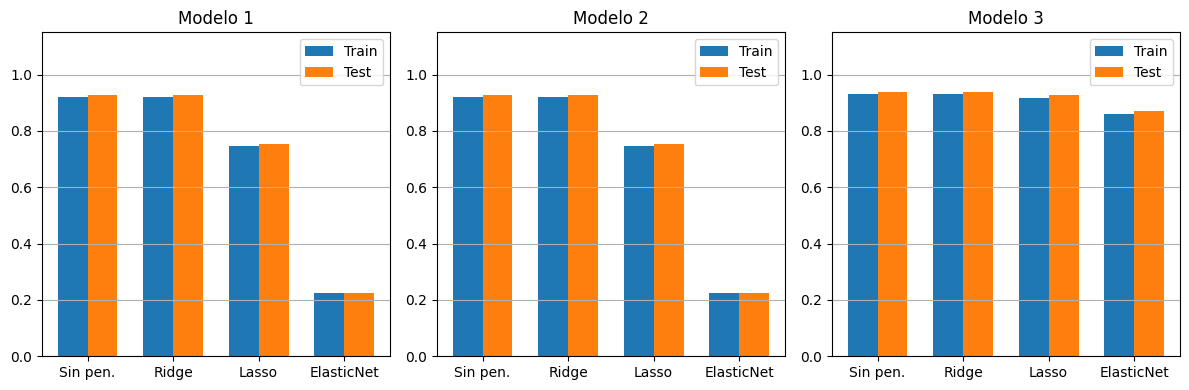

In [50]:
# 1, 3 → crea 1 fila y 3 columnas = 3 gráficas una al lado de la otra
# axes es un arreglo con 3 espacios, donde axes[0] → Modelo 1, axes[1] → Modelo 2 y axes[2] → Modelo 3
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Crea una lista con los nombres de los modelos.
modelos = ['M1', 'M2', 'M3']
# Crea un array de 4 categorías = sin penalización, con Ridge, con Lasso y con ElasticNet
x = np.arange(4)
# es el ancho de cada barra
width = 0.35

# este for se va a repetir 3 veces
# donde i=0 es el modelo 1, i=1 es el modelo 2 e i=2 es el modelo 3
for i in range(3):

    # Extraer valores de R²
    # toma los valores de la tabla comparativa anterior y por ejemplo lee modelos[0] = 'M1' + Train = tabla_r2['M1 Train']
    # modelos es la lista que creamos con todos los nombres de los modelos
    train_vals = tabla_r2[f'{modelos[i]} Train'].values
    test_vals  = tabla_r2[f'{modelos[i]} Test'].values

    # Crear las barras
    # x - width/2 para que la barra de Train sea la de la izquierda
    axes[i].bar(x - width/2, train_vals, width, label='Train')
    # x + width/2 para que la barra de Teste sea la de la derecha
    axes[i].bar(x + width/2, test_vals, width, label='Test')

    # Título, donde i = 0 → Modelo 1, i = 1 → Modelo 2 e i = 2 → Modelo 3
    # primero hace el modelo 1, después 0+1 =1 es el modelo 2 y 1+1= 2 es el modelo 3
    axes[i].set_title(f'Modelo {i+1}')

    # Primero le dice dónde están las posiciones de acuerdo a las categorías (0,1,2,3)
    axes[i].set_xticks(x)
    # y después les pone nombre a esas posiciones
    axes[i].set_xticklabels(['Sin pen.', 'Ridge', 'Lasso', 'ElasticNet'])

    # Fija el eje vertical: 0 a 1.15 y esto ayuda a que todas las gráficas tengan la misma escala.
    axes[i].set_ylim(0, 1.15)
    # La leyenda que aparece en la esquina superior = Train / Test
    axes[i].legend()
    axes[i].grid(axis='y')

# Evita que los títulos y etiquetas se encimen
plt.tight_layout()
plt.show()